# 基于Barra多因子模型的组合权重优化

### 抽取基础因子数据

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import cvxpy as cp
import datetime
from sklearn.linear_model import LinearRegression 

start_date = '2016-01-01'      
end_date = '2021-05-08'

m1 = M.instruments.v2(
    start_date=start_date,
    end_date=end_date,
    market='CN_STOCK_A',
    instrument_list=['600519.SHA','000858.SZA','000568.SZA','603288.SHA','002507.SZA','600887.SHA','000002.SZA','601633.SHA','600276.SHA','002773.SZA','600436.SHA','600196.SHA','002007.SZA','300122.SZA','000661.SZA','300760.SZA','300676.SZA','603259.SHA','600763.SHA','002027.SZA','000333.SZA','000651.SZA','600690.SHA','002050.SZA','601888.SHA','603899.SHA','600309.SHA','600585.SHA','600547.SHA','600362.SHA','600111.SHA','002460.SZA','601012.SHA','300750.SZA','600031.SHA','002415.SZA','603160.SHA','600036.SHA','300059.SZA','300957.SZA','300896.SZA','300014.SZA','600298.SHA']  # 嘉翼3号基金
    
#     instrument_list=['002812.SZA','002821.SZA','002841.SZA','002916.SZA','002925.SZA','002926.SZA','002938.SZA','002939.SZA','002958.SZA','003816.SZA','002001.SZA','002007.SZA','002008.SZA','002010.SZA','002013.SZA','002019.SZA','002024.SZA','002027.SZA','002032.SZA','002038.SZA','002044.SZA','002049.SZA','002050.SZA','002065.SZA','002074.SZA','002075.SZA','002078.SZA','002081.SZA','002085.SZA','002092.SZA','002110.SZA','002120.SZA','002127.SZA','002129.SZA','002142.SZA','002146.SZA','002152.SZA','002153.SZA','002157.SZA','002179.SZA','002180.SZA','002195.SZA','002202.SZA','002217.SZA','002223.SZA','002230.SZA','002236.SZA','002241.SZA','002252.SZA','002268.SZA','002271.SZA','002281.SZA','002294.SZA','002299.SZA','002304.SZA','002310.SZA','002311.SZA','002340.SZA','002352.SZA','002371.SZA','002372.SZA','002373.SZA','002384.SZA','002385.SZA','002399.SZA','002405.SZA','002410.SZA','002415.SZA','002422.SZA','002439.SZA','002456.SZA','002460.SZA','002463.SZA','002465.SZA','002466.SZA','002468.SZA','002475.SZA','002493.SZA','002500.SZA','002507.SZA','002508.SZA','002555.SZA','002558.SZA','002563.SZA','002572.SZA','002583.SZA','002594.SZA','002600.SZA','002601.SZA','002602.SZA','002607.SZA','002608.SZA','002624.SZA','002670.SZA','002673.SZA','002714.SZA','002736.SZA','002739.SZA','002773.SZA','002797.SZA']  # 中小板
    
#     instrument_list=['300001.SZA','300003.SZA','300009.SZA','300010.SZA','300012.SZA','300014.SZA','300015.SZA','300017.SZA','300024.SZA','300026.SZA','300033.SZA','300038.SZA','300058.SZA','300059.SZA','300068.SZA','300070.SZA','300072.SZA','300073.SZA','300078.SZA','300088.SZA','300098.SZA','300113.SZA','300115.SZA','300122.SZA','300124.SZA','300133.SZA','300136.SZA','300142.SZA','300144.SZA','300146.SZA','300166.SZA','300168.SZA','300170.SZA','300180.SZA','300182.SZA','300188.SZA','300203.SZA','300207.SZA','300212.SZA','300222.SZA','300226.SZA','300244.SZA','300251.SZA','300253.SZA','300271.SZA','300274.SZA','300285.SZA','300294.SZA','300296.SZA','300308.SZA','300315.SZA','300316.SZA','300324.SZA','300347.SZA','300357.SZA','300369.SZA','300377.SZA','300383.SZA','300408.SZA','300413.SZA','300418.SZA','300433.SZA','300450.SZA','300454.SZA','300457.SZA','300459.SZA','300463.SZA','300474.SZA','300476.SZA','300482.SZA','300496.SZA','300498.SZA','300529.SZA','300558.SZA','300567.SZA','300595.SZA','300601.SZA','300616.SZA','300618.SZA','300628.SZA','300630.SZA','300633.SZA','300634.SZA','300661.SZA','300666.SZA','300674.SZA','300676.SZA','300682.SZA','300699.SZA','300724.SZA','300741.SZA','300747.SZA','300748.SZA','300750.SZA','300759.SZA','300760.SZA','300761.SZA','300766.SZA','300768.SZA','300773.SZA']  # 创业板
    
#     instrument_list=['000001.SZA','002142.SZA','002807.SZA','002839.SZA','002936.SZA','002948.SZA','002958.SZA','002966.SZA','600000.SHA','600015.SHA','600016.SHA','600036.SHA','600908.SHA','600919.SHA','600926.SHA','600928.SHA','601009.SHA','601077.SHA','601128.SHA','601166.SHA','601169.SHA','601229.SHA','601288.SHA','601328.SHA','601398.SHA','601577.SHA','601658.SHA','601818.SHA','601838.SHA','601860.SHA','601916.SHA','601939.SHA','601988.SHA','601997.SHA','601998.SHA','603323.SHA']  # 中证银行
    
#     instrument_list=['000568.SZA','000596.SZA','000729.SZA','000799.SZA','000858.SZA','000860.SZA','000869.SZA','002304.SZA','002461.SZA','002568.SZA','300755.SZA','600059.SHA','600132.SHA','600197.SHA','600199.SHA','600519.SHA','600559.SHA','600600.SHA','600779.SHA','600809.SHA','603198.SHA','603369.SHA','603589.SHA','603919.SHA']  # 中证酒
    
#     instrument_list=['000538.SZA','000661.SZA','000963.SZA','002001.SZA','002007.SZA','002044.SZA','002252.SZA','002422.SZA','002773.SZA','002821.SZA','300003.SZA','300015.SZA','300122.SZA','300142.SZA','300347.SZA','300529.SZA','300601.SZA','300676.SZA','600085.SHA','600161.SHA','600196.SHA','600276.SHA','600299.SHA','600332.SHA','600436.SHA','600763.SHA','600998.SHA','601607.SHA','603087.SHA','603259.SHA','603392.SHA','603658.SHA']  # 医药300
    
#     instrument_list=['000970.SZA','002050.SZA','002056.SZA','002074.SZA','002091.SZA','002126.SZA','002276.SZA','002340.SZA','002407.SZA','002460.SZA','002518.SZA','002594.SZA','002709.SZA','002812.SZA','002850.SZA','300001.SZA','300014.SZA','300035.SZA','300037.SZA','300073.SZA','300124.SZA','300224.SZA','300450.SZA','300457.SZA','300484.SZA','300568.SZA','300618.SZA','300742.SZA','300745.SZA','300750.SZA','300769.SZA','600066.SHA','600549.SHA','600563.SHA','600580.SHA','600699.SHA','600733.SHA','600884.SHA','600885.SHA','603026.SHA','603659.SHA','603799.SHA','688005.SHA','688006.SHA','688116.SHA','688388.SHA']  # 新能源车
    
)

m7 = M.input_features.v1(
    features="""
beta_csi500_180_0
ta_mom_60_0
log(market_cap_0+0.0001)
west_eps_ftm_0/close_0
fs_net_income_0/market_cap_0
fs_eps_0/close_0
volatility_240_0
return_20
swing_volatility_240_0
fs_net_profit_qoq_0
fs_net_profit_yoy_0
fs_net_profit_0
west_netprofit_ftm_0
fs_common_equity_0/market_cap_0
(fs_non_current_liabilities_0+market_cap_0)/market_cap_0
fs_total_liability_0/(fs_current_assets_0+fs_non_current_assets_0)
(fs_common_equity_0+fs_non_current_liabilities_0)/fs_common_equity_0
turn_0
"""
)

m8 = M.general_feature_extractor.v7(
    instruments=m1.data,
    features=m7.data,
    start_date='',
    end_date='',
    before_start_days=0
)

m9 = M.derived_feature_extractor.v3(
    input_data=m8.data,
    features=m7.data,
    date_col='date',
    instrument_col='instrument',
    drop_na=False,
    remove_extra_columns=False
)
 
# the material we need to build the factors are stored in Material DataFrame 
materials = m9.data.read_df()
materials = materials.set_index('date')
materials.info()

[2021-05-19 12:09:57.127256] INFO: moduleinvoker: instruments.v2 开始运行..

[2021-05-19 12:09:57.270998] INFO: moduleinvoker: instruments.v2 运行完成[0.143771s].

[2021-05-19 12:09:57.317321] INFO: moduleinvoker: input_features.v1 开始运行..

[2021-05-19 12:09:57.323969] INFO: moduleinvoker: 命中缓存

[2021-05-19 12:09:57.326774] INFO: moduleinvoker: input_features.v1 运行完成[0.009447s].

[2021-05-19 12:09:57.407910] INFO: moduleinvoker: general_feature_extractor.v7 开始运行..

[2021-05-19 12:10:03.097370] INFO: 基础特征抽取: 年份 2016, 特征行数=8406

[2021-05-19 12:10:08.121699] INFO: 基础特征抽取: 年份 2017, 特征行数=9010

[2021-05-19 12:10:14.590032] INFO: 基础特征抽取: 年份 2018, 特征行数=9396

[2021-05-19 12:10:20.897890] INFO: 基础特征抽取: 年份 2019, 特征行数=9970

[2021-05-19 12:10:26.764888] INFO: 基础特征抽取: 年份 2020, 特征行数=10023

[2021-05-19 12:10:29.968944] INFO: 基础特征抽取: 年份 2021, 特征行数=3430

[2021-05-19 12:10:30.191073] INFO: 基础特征抽取: 总行数: 50235

[2021-05-19 12:10:30.203755] INFO: moduleinvoker: general_feature_extractor.v7 运行完成[32.795851s].

[2021-05-19 12:10:30.285910] INFO: moduleinvoker: derived_feature_extractor.v3 开始运行..

[2021-05-19 12:10:30.845094] INFO: derived_feature_extractor: 提取完成 log(market_cap_0+0.0001), 0.005s

[2021-05-19 12:10:30.850578] INFO: derived_feature_extractor: 提取完成 west_eps_ftm_0/close_0, 0.003s

[2021-05-19 12:10:30.856582] INFO: derived_feature_extractor: 提取完成 fs_net_income_0/market_cap_0, 0.004s

[2021-05-19 12:10:30.863482] INFO: derived_feature_extractor: 提取完成 fs_eps_0/close_0, 0.003s

[2021-05-19 12:10:30.869282] INFO: derived_feature_extractor: 提取完成 fs_common_equity_0/market_cap_0, 0.004s

[2021-05-19 12:10:30.873834] INFO: derived_feature_extractor: 提取完成 (fs_non_current_liabilities_0+market_cap_0)/market_cap_0, 0.002s

[2021-05-19 12:10:30.878787] INFO: derived_feature_extractor: 提取完成 fs_total_liability_0/(fs_current_assets_0+fs_non_current_assets_0), 0.003s

[2021-05-19 12:10:30.882854] INFO: derived_feature_extractor: 提取完成 (fs_common_equity_0+fs_non_current_liabilities_0)/fs_common_equity_0, 0.002s

[2021-05-19 12:10:31.098032] INFO: derived_feature_extractor: /y_2016, 8406

[2021-05-19 12:10:31.224041] INFO: derived_feature_extractor: /y_2017, 9010

[2021-05-19 12:10:31.339067] INFO: derived_feature_extractor: /y_2018, 9396

[2021-05-19 12:10:31.455971] INFO: derived_feature_extractor: /y_2019, 9970

[2021-05-19 12:10:31.579668] INFO: derived_feature_extractor: /y_2020, 10023

[2021-05-19 12:10:31.646978] INFO: derived_feature_extractor: /y_2021, 3430

[2021-05-19 12:10:31.797008] INFO: moduleinvoker: derived_feature_extractor.v3 运行完成[1.511108s].

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50235 entries, 2016-07-04 to 2021-05-07
Data columns (total 29 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   beta_csi500_180_0                                                     49111 non-null  float32
 1   close_0                                                               50235 non-null  float32
 2   fs_common_equity_0                                                    42747 non-null  float64
 3   fs_current_assets_0                                                   48284 non-null  float64
 4   fs_eps_0                                                              49211 non-null  float32
 5   fs_net_income_0                                                       49557 non-null  float64
 6   fs_net_profit_0                                                       49574 n

## 构建衍生因子

In [2]:
# 构建九大类因子里面的所有小因子
temporary_storage_dict = dict()
temporary_storage_dict['STOM'] = materials.groupby('instrument')['turn_0'].rolling(21).sum().apply(lambda x:np.log(x)).reset_index().set_index('date').rename(columns={'turn_0':'STOM'})
temporary_storage_dict['STOQ'] = temporary_storage_dict['STOM'].groupby('instrument').apply(lambda x:np.exp(x['STOM'])).rolling(3).mean().apply(lambda x:np.log(x)).reset_index().set_index('date').rename(columns={'STOM':'STOQ'})
temporary_storage_dict['STOA'] = temporary_storage_dict['STOM'].groupby('instrument').apply(lambda x:np.exp(x['STOM'])).rolling(12).mean().apply(lambda x:np.log(x)).reset_index().set_index('date').rename(columns={'STOM':'STOA'})

temporary_storage_dict['MLEV'] = materials[['instrument','(fs_non_current_liabilities_0+market_cap_0)/market_cap_0']].rename(columns={'(fs_non_current_liabilities_0+market_cap_0)/market_cap_0':'MLEV'})
temporary_storage_dict['DTOA'] = materials[['instrument','fs_total_liability_0/(fs_current_assets_0+fs_non_current_assets_0)']].rename(columns={'fs_total_liability_0/(fs_current_assets_0+fs_non_current_assets_0)':'DTOA'})
temporary_storage_dict['BLEV'] = materials[['instrument','(fs_common_equity_0+fs_non_current_liabilities_0)/fs_common_equity_0']].rename(columns={'(fs_common_equity_0+fs_non_current_liabilities_0)/fs_common_equity_0':'BLEV'})
 
temporary_storage_dict['Value'] = materials[['instrument','fs_common_equity_0/market_cap_0']].rename(columns={'fs_common_equity_0/market_cap_0':'Value'})
 
temporary_storage_dict['Growth'] = materials[['instrument','fs_net_profit_yoy_0']].rename(columns={'fs_net_profit_yoy_0':'Growth'})
 
temporary_storage_dict['EPIBS'] = materials[['instrument','west_eps_ftm_0/close_0']].rename(columns={'west_eps_ftm_0/close_0':'EPIBS'})
temporary_storage_dict['ETOP'] = materials[['instrument','fs_net_income_0/market_cap_0']].rename(columns={'fs_net_income_0/market_cap_0':'ETOP'})
temporary_storage_dict['CETOP'] = materials[['instrument','fs_eps_0/close_0']].rename(columns={'fs_eps_0/close_0':'CETOP'})

temporary_storage_dict['DASTD'] = materials[['instrument','volatility_240_0']].rename(columns={'volatility_240_0':'DASTD'})
temporary_storage_dict['GMRA'] = materials.groupby('instrument')['return_20'].rolling(12).apply(lambda x:np.log(1+np.max(x))-np.log(1+np.min(x))).reset_index().set_index('date').rename(columns={'return_20':'GMRA'})

temporary_storage_dict['Size'] = materials[['instrument','log(market_cap_0+0.0001)']].rename(columns={'log(market_cap_0+0.0001)':'Size'})

temporary_storage_dict['Momentum'] = materials[['instrument','ta_mom_60_0']].rename(columns={'ta_mom_60_0':'Momentum'})

temporary_storage_dict['Beta'] = materials[['instrument','beta_csi500_180_0']].rename(columns={'beta_csi500_180_0':'Beta'})

for i in list(set(temporary_storage_dict.keys())):
    temporary_storage_dict[i] = temporary_storage_dict[i].reset_index()

    
initiate_factor_df  = temporary_storage_dict['STOM']  # 这里我们先取STOM因子数据
tmp_raw_factor_name = list(set(temporary_storage_dict.keys()).difference(['STOM']))
for i in tmp_raw_factor_name:
    initiate_factor_df = initiate_factor_df.merge(temporary_storage_dict[i], ) # 共18列
initiate_factor_df

,date,instrument,STOM,Growth,Size,STOQ,Momentum,GMRA,EPIBS,MLEV,Value,ETOP,BLEV,DTOA,DASTD,STOA,CETOP,Beta
0,2016-07-04,000002.SZA,NaN,28.143900,26.215302,NaN,1122.812012,NaN,0.000715,1.260308,0.414568,0.005149,1.627901,0.789403,0.032727,NaN,0.000027,0.416088
1,2016-07-05,000002.SZA,NaN,28.143900,26.109891,NaN,832.231934,NaN,0.000795,1.289245,0.460654,0.005721,1.627901,0.789403,0.033263,NaN,0.000030,0.413155
2,2016-07-06,000002.SZA,NaN,28.143900,26.110396,NaN,847.525635,NaN,0.000795,1.289099,0.460422,0.005718,1.627901,0.789403,0.033090,NaN,0.000030,0.415551
3,2016-07-07,000002.SZA,NaN,28.143900,26.059634,NaN,730.274048,NaN,0.000837,1.304153,0.484397,0.006016,1.627901,0.789403,0.033248,NaN,0.000031,0.416609
4,2016-07-08,000002.SZA,NaN,28.143900,26.055908,NaN,745.567627,NaN,0.000840,1.305289,0.486205,0.006038,1.627901,0.789403,0.032646,NaN,0.000031,0.418294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50230,2021-04-28,603899.SHA,2.220821,18.427099,25.169823,2.248623,-8.768173,0.058269,0.009144,1.001213,0.060863,0.014512,1.019937,0.439646,0.024929,2.273422,0.006907,0.820387
50231,2021-04-29,603899.SHA,2.169820,42.502300,25.166993,2.212213,-8.000168,0.079990,0.009175,1.003009,0.065253,0.003881,1.046114,0.400360,0.024926,2.264595,0.001815,0.855956
50232,2021-04-30,603899.SHA,2.118717,42.502300,25.163171,2.170655,-2.602722,0.079990,0.009200,1.003021,0.065503,0.003896,1.046114,0.400360,0.024923,2.252251,0.001822,0.857420
50233,2021-05-06,603899.SHA,2.121717,42.502300,25.139591,2.137027,-10.282883,0.088076,0.009440,1.003093,0.067065,0.003988,1.046114,0.400360,0.024963,2.238402,0.001865,0.847949


### 去极值处理

In [14]:
# 去极值处理
def winsorize(df):
    factors = set(df.columns).difference(['date', 'instrument'])
    for factor in factors:
        if df[df[factor].isnull()==True].shape[0] == len(df):
            continue
        median = np.median(df[factor])
        MAD = np.mean(np.abs(df[factor]) - median)
        df[factor][df[factor]>median+5*MAD] = median+5*MAD  # 剔除偏离中位数5倍以上的数据
        df[factor][df[factor]<median-5*MAD] = median-5*MAD
    return df

# 截面数据去极值,返回日频因子数据
extrema_remove_df = initiate_factor_df.groupby('date').apply(winsorize)
extrema_remove_df

,date,instrument,STOM,Growth,Size,STOQ,Momentum,GMRA,EPIBS,MLEV,Value,ETOP,BLEV,DTOA,DASTD,STOA,CETOP,Beta
0,2016-07-04,000002.SZA,NaN,28.143900,25.087745,NaN,328.264862,NaN,0.000715,1.260308,0.414568,0.005149,1.627901,0.789403,0.032727,NaN,0.000027,0.651316
1,2016-07-05,000002.SZA,NaN,28.143900,25.057836,NaN,314.717957,NaN,0.000795,1.289245,0.460654,0.005721,1.627901,0.789403,0.033263,NaN,0.000030,0.652136
2,2016-07-06,000002.SZA,NaN,28.143900,25.025889,NaN,367.366821,NaN,0.000795,1.289099,0.460422,0.005718,1.627901,0.789403,0.033090,NaN,0.000030,0.644868
3,2016-07-07,000002.SZA,NaN,28.143900,25.081800,NaN,359.072327,NaN,0.000837,1.304153,0.484397,0.006016,1.627901,0.789403,0.033248,NaN,0.000031,0.626029
4,2016-07-08,000002.SZA,NaN,28.143900,25.043276,NaN,336.030609,NaN,0.000840,1.305289,0.486205,0.006038,1.627901,0.789403,0.032646,NaN,0.000031,0.622101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50230,2021-04-28,603899.SHA,2.489692,18.427099,27.292033,2.420519,-8.768173,0.058269,0.009144,1.001213,0.060863,0.014512,1.019937,0.439646,0.024929,2.273422,0.006907,0.820387
50231,2021-04-29,603899.SHA,2.180144,42.502300,27.301037,2.514227,-8.000168,0.079990,0.009175,1.003009,0.065253,0.003881,1.046114,0.400360,0.024926,2.264595,0.001815,0.855956
50232,2021-04-30,603899.SHA,2.211791,42.502300,27.189498,2.220451,-2.602722,0.079990,0.009200,1.003021,0.065503,0.003896,1.046114,0.400360,0.024923,2.252251,0.001822,0.857420
50233,2021-05-06,603899.SHA,2.286590,42.502300,27.219902,2.225079,-10.282883,0.088076,0.009440,1.003093,0.067065,0.003988,1.046114,0.400360,0.024963,2.238402,0.001865,0.847949


### 中性化处理和标准化处理

In [10]:
# 读取行业数据和市值数据,进行行业中性化处理和市值中性化处理,并月度化
ins = list(extrema_remove_df.instrument.unique())
industry_info = D.history_data(ins, start_date, end_date, ['industry_sw_level1','market_cap', 'market_cap_float'])   
industry_info['market_cap_float'] = np.log10(industry_info['market_cap_float'])  # 对市值因子取对数

industry_df = industry_info[(industry_info.industry_sw_level1!=0)&(industry_info.industry_sw_level1!=-1)].set_index('date')  # 取出其中有行业分类的条目，如果行业划分是0或者-1就算了，代表无划分

industry_df = industry_df.groupby('instrument').apply(lambda x: x.resample('W').last())
# industry_df.fillna(method='ffill', inplace=True)
# industry_df['industry_sw_level1'] = industry_df['industry_sw_level1'].astype('int').astype('str')
industry_df.index = industry_df.index.droplevel(0)
industry_df.reset_index(inplace=True)
industry_df#.info()

,date,instrument,industry_sw_level1,market_cap,market_cap_float
0,2016-01-10,000002.SZA,430000.0,2.699909e+11,11.375616
1,2016-01-17,000002.SZA,430000.0,2.696860e+11,11.375058
2,2016-01-24,000002.SZA,430000.0,2.696860e+11,11.375058
3,2016-01-31,000002.SZA,430000.0,2.696860e+11,11.375058
4,2016-02-07,000002.SZA,430000.0,2.696860e+11,11.375058
...,...,...,...,...,...
10998,2021-04-11,603899.SHA,360000.0,8.057491e+10,10.902708
10999,2021-04-18,603899.SHA,360000.0,8.457212e+10,10.923735
11000,2021-04-25,603899.SHA,360000.0,8.548100e+10,10.928377
11001,2021-05-02,603899.SHA,360000.0,8.476688e+10,10.924734


In [15]:
# 风格因子数据转换成月度，并与市值行业数据的拼接， 并把行业因子转换成dummy数据 
extrema_remove_df.set_index('date', inplace=True)
extrema_remove_df = extrema_remove_df.groupby('instrument').apply(lambda x: x.resample('W').last())  # pandas 处理时间序列数据，将原始数据转换为月末数据
extrema_remove_df.index = extrema_remove_df.index.droplevel(0)
extrema_remove_df.reset_index(inplace=True)

extrema_remove_df = extrema_remove_df.merge(industry_df, on=['date', 'instrument']) # 风格因子数据和市值行业数据拼接

# 截面缺失值数据使用行业均值填充
extrema_remove_df = extrema_remove_df.groupby(['date', 'industry_sw_level1']).apply(lambda t: t.fillna(np.mean(t, axis=0)))
extrema_remove_df.reset_index(inplace=True, drop=True)

# 行业属性数据哑变量
extrema_remove_df['industry_sw_level1'] = extrema_remove_df['industry_sw_level1'].astype('int').astype('str')
dummy_industry_df = pd.get_dummies(extrema_remove_df['industry_sw_level1'], prefix='industry_prefix')  # prefix, get_dummies转换后，列名的前缀

# 哑变量与截面数据进行横向拼接
merge_df = pd.concat([extrema_remove_df, dummy_industry_df], axis=1).sort_values(['date', 'instrument'])  # 原始的行业因子那列应该还在
merge_df

,date,instrument,STOM,Growth,Size,STOQ,Momentum,GMRA,EPIBS,MLEV,...,industry_prefix_370000,industry_prefix_430000,industry_prefix_460000,industry_prefix_480000,industry_prefix_490000,industry_prefix_610000,industry_prefix_630000,industry_prefix_640000,industry_prefix_710000,industry_prefix_720000
8,2016-01-10,000333.SZA,NaN,22.999599,24.863991,NaN,6.142181,NaN,0.026470,1.004245,...,0,0,0,0,0,0,0,0,0,0
11,2016-01-10,000568.SZA,NaN,6.094900,24.863991,NaN,55.951233,NaN,0.001520,1.002895,...,0,0,0,0,0,0,0,0,0,0
9,2016-01-10,000651.SZA,NaN,1.273700,24.863991,NaN,160.989014,NaN,0.000890,1.003468,...,0,0,0,0,0,0,0,0,0,0
18,2016-01-10,000661.SZA,NaN,75.305603,24.863991,NaN,-15.061371,NaN,0.009102,1.013361,...,1,0,0,0,0,0,0,0,0,0
12,2016-01-10,000858.SZA,NaN,-2.215000,24.863991,NaN,-6.559265,NaN,0.003779,1.001949,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10579,2021-05-09,601888.SHA,2.556606,13129.451172,27.337571,2.555206,-39.211243,0.080262,0.010584,1.005985,...,0,0,1,0,0,0,0,0,0,0
10553,2021-05-09,603160.SHA,3.110395,-23.513399,27.337571,3.069342,-16.568161,0.080346,0.022947,1.001493,...,0,0,0,0,0,0,0,0,0,0
10577,2021-05-09,603259.SHA,3.366152,394.917389,27.337571,3.338305,-55.806854,0.116138,0.006422,1.013726,...,1,0,0,0,0,0,0,0,0,0
10564,2021-05-09,603288.SHA,2.171382,21.127600,27.337571,2.221756,-170.255615,0.113388,0.003304,1.000744,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# 行业中性化处理和市值中性化处理
def calcu_single_factor(df, factor):
    industry_factor = [i for i in df.columns if i[:15]=='industry_prefix']  # 列出所有的行业因子column
    # 对市值因子和行业因子进行回归
    xvars = ['market_cap_float'] + industry_factor
    used_factors = xvars + [factor] + ['instrument']
    
    used_factors_df = df[used_factors]
    used_factors_df = used_factors_df[~used_factors_df.isnull().T.any().T]  # 检查控制，返回是否至少一个元素为真的行
    if len(used_factors_df) == 0:
        return None
    X = used_factors_df[xvars]
    y = used_factors_df[factor]
    reg = LinearRegression()  
    try:
        reg.fit(X,y)   # 将行业因子因子和市值因子对特定因子作回归  given x, get y from the model y = b0+b1x
        res = y-reg.predict(X)
        used_factors_df[factor] = res  # 残差即为中性化处理后的结果
    except ValueError as e:
        used_factors_df[factor] = np.nan 

    return used_factors_df[['instrument',factor]]
 
# 标准化处理
def standardlize(x):
    return (x-x.mean())/x.std()

factor_data_after_neutralize = pd.DataFrame(columns=['date','instrument'])
detail_style_factor = [m for m in initiate_factor_df.columns if m not in ['date','instrument', 'market_cap', 'market_cap_float']]

# 对风格因子进行市值中性化处理,共计16个风格因子
for factor in detail_style_factor: 
    result_temp = merge_df.groupby('date').apply(lambda x: calcu_single_factor(x, factor)).reset_index().drop('level_1',axis=1)
    factor_data_after_neutralize = factor_data_after_neutralize.merge(result_temp, on=['date', 'instrument'], how='outer')
    
for factor in detail_style_factor:
    factor_data_after_neutralize[factor] = factor_data_after_neutralize.groupby('date')[factor].apply(standardlize)

# 用0值填充标准化后的缺失值 
factor_data_after_standard = factor_data_after_neutralize.fillna(0)
factor_data_after_standard

,date,instrument,STOM,Growth,Size,STOQ,Momentum,GMRA,EPIBS,MLEV,Value,ETOP,BLEV,DTOA,DASTD,STOA,CETOP,Beta
0,2016-02-07,000333.SZA,-0.042874,9.613877e-02,0.000000e+00,-0.047043,1.293617e+00,-1.067050e+00,3.602658e+00,-8.370433e-01,-7.957364e-02,7.907772e-01,-7.480368e-01,-2.841131e-02,-7.505110e-01,0.0,4.127355e+00,-1.043608e+00
1,2016-02-07,000568.SZA,0.038400,2.200803e-02,0.000000e+00,0.051899,-5.656947e-01,-5.345107e-01,-8.897732e-01,-1.361492e-01,7.600294e-01,8.422626e-01,-2.566539e-01,-3.673625e-01,6.177930e-01,0.0,-7.007615e-01,6.751332e-01
2,2016-02-07,000651.SZA,0.401152,-2.853961e-01,0.000000e+00,0.406099,1.223678e+00,1.496421e-01,-1.285859e+00,-9.259674e-01,-4.579578e-01,1.984729e-01,-7.899281e-01,1.059920e+00,2.465717e-01,0.0,-1.497350e+00,-2.803085e-02
3,2016-02-07,000661.SZA,1.193135,4.815627e-01,0.000000e+00,1.210669,-7.508934e-01,-2.524088e-01,5.673458e-01,-3.917755e-01,-1.431431e-01,1.811399e+00,8.327615e-02,1.839806e+00,4.159813e-01,0.0,3.743336e-01,-4.577048e-01
4,2016-02-07,000858.SZA,0.286672,-3.576131e-01,0.000000e+00,0.279492,1.582469e+00,1.771766e-02,-1.357416e-01,-2.856207e-01,1.817559e+00,5.750477e-01,-3.518960e-01,-1.572511e+00,3.560000e-01,0.0,-1.485973e-01,1.544825e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10583,2016-01-31,603899.SHA,0.000000,-6.775223e-15,0.000000e+00,0.000000,5.696517e-15,-2.240937e-15,-4.733217e-15,4.838867e-15,-2.001292e-15,-9.284016e-15,6.175123e-15,-1.609259e-15,-1.901662e-15,0.0,-5.219007e-15,-3.124711e-15
10584,2016-07-10,000002.SZA,0.000000,-5.287049e-15,2.904799e-15,0.000000,3.735406e-15,0.000000e+00,-1.749583e-15,-7.644062e-16,1.197666e-15,-4.505657e-16,-1.036054e-15,-8.278046e-16,4.488319e-16,0.0,4.593278e-16,-3.762604e-16
10585,2016-07-17,000002.SZA,0.000000,-1.059220e-15,2.078622e-15,0.000000,2.694311e-15,0.000000e+00,3.712731e-15,-1.610013e-14,3.592262e-16,3.210163e-15,-9.809943e-15,-9.844600e-15,3.740503e-15,0.0,3.148029e-15,-2.096868e-15
10586,2016-07-24,000002.SZA,0.000000,-1.758726e-15,-8.126950e-16,0.000000,-6.070977e-15,-1.494158e-15,-7.749382e-16,-1.004713e-15,-8.674601e-17,-2.010882e-15,4.873212e-15,6.629944e-15,2.526021e-15,0.0,-2.153049e-15,1.283971e-16


### 获取股票价格数据

In [20]:
# 获取股票价格并月度化
start = factor_data_after_standard.date.min().strftime('%Y-%m-%d')
end = factor_data_after_standard.date.max().strftime('%Y-%m-%d')
ins = list(set(factor_data_after_standard.instrument))

price = DataSource('bar1d_CN_STOCK_A').read(ins, start_date=start, end_date=end, fields=['close'])
price.rename(columns={'close':'price'}, inplace=True)
price = price.set_index('date').groupby('instrument').apply(lambda x: x.resample('W').last())
price.index = price.index.droplevel(0)
price.fillna(method='ffill', inplace=True)
price.reset_index(inplace=True)
price

,date,instrument,price
0,2016-01-17,000002.SZA,3113.541504
1,2016-01-24,000002.SZA,3113.541504
2,2016-01-31,000002.SZA,3113.541504
3,2016-02-07,000002.SZA,3113.541504
4,2016-02-14,000002.SZA,3113.541504
...,...,...,...
10923,2021-04-11,603899.SHA,185.347885
10924,2021-04-18,603899.SHA,194.542740
10925,2021-04-25,603899.SHA,196.633453
10926,2021-05-02,603899.SHA,194.990753


In [22]:
# 通过价格计算收益率并合成大类风格因子
tmp_factor = [m for m in merge_df.columns if m not in ['market_cap_float','industry_sw_level1']]
industry_prefix_factor = list(set(tmp_factor).difference(set(detail_style_factor)))  # industry_prefix_factor  是date instrument 和行业因子,共计30个因子. set()用于寻找不重复的list元素

# 构建一个总的数据表, 合并行业因子和价格
monthly_style_and_industry_factor = factor_data_after_standard.merge(price, on=['date', 'instrument'], how='inner')
monthly_style_and_industry_factor = monthly_style_and_industry_factor.merge(merge_df[industry_prefix_factor], on=['date', 'instrument'], how='inner').set_index('date')  
 
# 计算出收益率
monthly_style_and_industry_factor.reset_index(inplace=True)
 
monthly_price_df = monthly_style_and_industry_factor.pivot_table(values='price',columns='instrument',index='date')
monthly_style_and_industry_factor = monthly_style_and_industry_factor.merge(monthly_price_df.pct_change().shift(-1).unstack().to_frame('return').reset_index(),on=['date','instrument'])
monthly_style_and_industry_factor = monthly_style_and_industry_factor.dropna()

# 小因子等权重合并成大因子, 这里未来可以采取IC_IR法
monthly_style_and_industry_factor['Volatility'] = (monthly_style_and_industry_factor['DASTD']+monthly_style_and_industry_factor['GMRA'])/2
monthly_style_and_industry_factor['EarningYields'] = (monthly_style_and_industry_factor['EPIBS']+monthly_style_and_industry_factor['ETOP']+monthly_style_and_industry_factor['CETOP'])/3
monthly_style_and_industry_factor['Leverage'] = (monthly_style_and_industry_factor['MLEV']+monthly_style_and_industry_factor['BLEV']+monthly_style_and_industry_factor['DTOA'])/3
monthly_style_and_industry_factor['Liquidity'] = (monthly_style_and_industry_factor['STOM']+monthly_style_and_industry_factor['STOQ']+monthly_style_and_industry_factor['STOA'])/3
monthly_style_and_industry_factor.drop(['DASTD','GMRA','EPIBS','ETOP','CETOP','MLEV','BLEV','DTOA','STOM','STOQ','STOA'], axis=1, inplace=True)
monthly_style_and_industry_factor.rename(columns={'Size':'Size 规模','Value':'Value 账面市值比','Growth':'Growth 成长性','Momentum':'Momentum 动量','Volatility':'Volatility 残余波动率','EarningYields':'EarningYields 盈利率','Leverage':'Leverage 杠杆率', 'Liquidity':'Liquidity 流动性'}, inplace=True)
monthly_style_and_industry_factor#['market_cap']

0        1.169659e+11
1        2.968568e+10
2        1.133965e+11
3        1.275181e+10
4        8.988849e+10
             ...     
10549    1.487640e+10
10550    2.069841e+11
10551    1.974904e+11
10552    1.919709e+11
10553    1.892111e+11
Name: market_cap, Length: 10511, dtype: float64

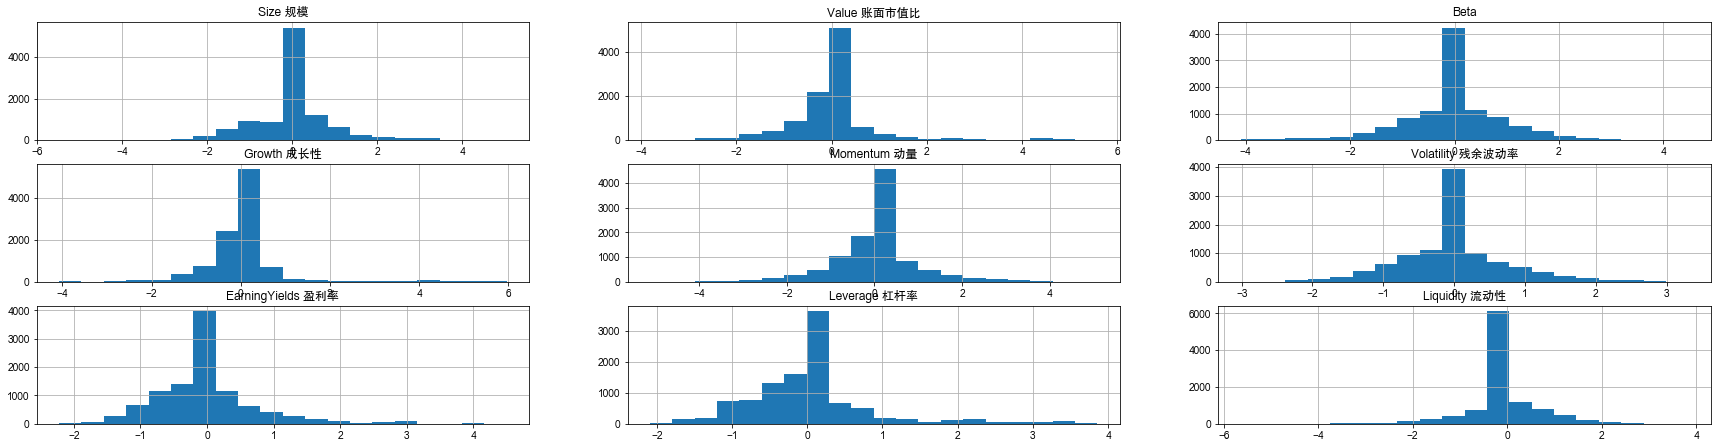

In [256]:
# 因子的分布，用于检查去极值和标准化操作的效果
t_df = monthly_style_and_industry_factor[['Size 规模','Value 账面市值比','Beta','Growth 成长性','Momentum 动量','Volatility 残余波动率','EarningYields 盈利率','Leverage 杠杆率', 'Liquidity 流动性']]
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 10))
for i, name in enumerate(t_df.columns):
    ax = fig.add_subplot(4, 3, i+1)
    t_df.iloc[:, i].hist(bins=20, ax=ax)
    ax.set_title(name)

### 计算股票特质收益率

In [200]:
# 回归(这里包括九大风格因子和行业因子), 通过回归计算出每个股票的残差，即特质收益率
def calcu_factor_specified_return(df):
    xvars = list(set(df.keys()).difference(['date','instrument','return','price']))
    X = df[xvars]
    y = df['return']
    reg = LinearRegression()
    try:
        reg.fit(X,y)
        res = y-reg.predict(X)
        df['specified_return'] = res
    except ValueError as e:
        df['specified_return'] = np.nan 

    return df

residual_ret = monthly_style_and_industry_factor.groupby('date').apply(lambda x: calcu_factor_specified_return(x))  # 横截面回归的groupby一定是基于date的
residual_ret = residual_ret[['instrument', 'date', 'specified_return']]    # 一致的
residual_ret.fillna(0, inplace=True)
residual_ret = residual_ret.sort_values('date').set_index('date')
residual_ret

,instrument,specified_return
date,,
2016-01-17,603899.SHA,7.806256e-17
2016-01-17,603288.SHA,-3.051008e-02
2016-01-17,601888.SHA,-5.551115e-17
2016-01-17,601633.SHA,1.526557e-16
2016-01-17,601012.SHA,4.163336e-16
...,...,...
2021-05-02,002773.SZA,1.609660e-02
2021-05-02,002507.SZA,7.911442e-03
2021-05-02,002460.SZA,-7.807670e-03


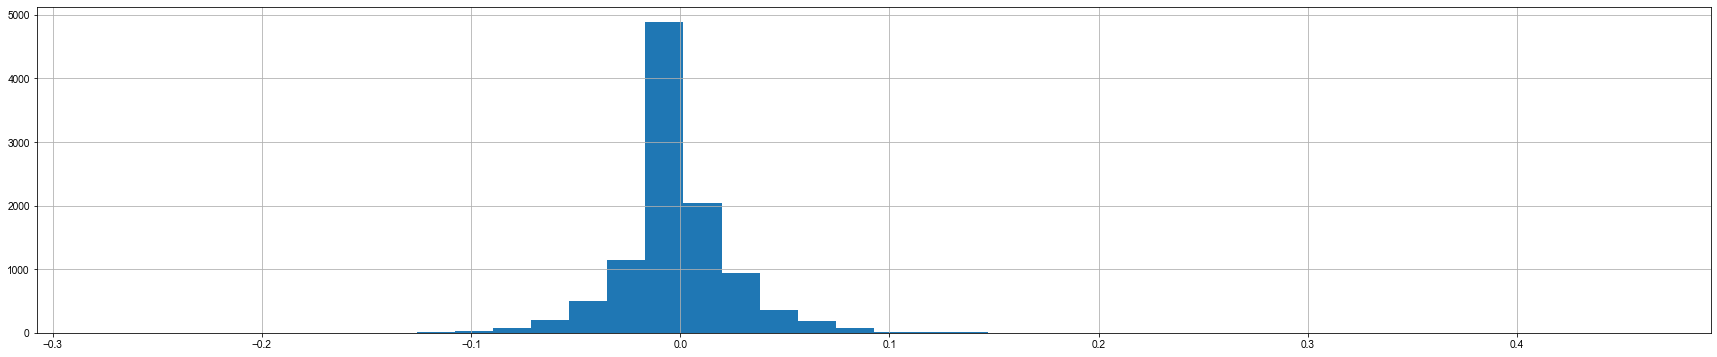

In [278]:
# 特意收益率分布
ax = plt.figure(figsize=(30, 6)).add_subplot(111)
ax = residual_ret['specified_return'].hist(bins=40, ax=ax)

### 计算因子收益率

In [201]:
# 对收益率序列做回归,这里包括九大风格因子和行业因子 
C = dict()
end_month_date = list(set(monthly_style_and_industry_factor.date))
end_month_date.sort()
 
# 全部因子，包括28个行业因子和9个大类风格因子
# style_factor = ['Value','Growth','Size','Beta','Momentum','Volatility','EarningYields','Leverage','Liquidity']
style_factor = ['Size 规模','Value 账面市值比','Beta','Growth 成长性','Momentum 动量','Volatility 残余波动率','EarningYields 盈利率','Leverage 杠杆率', 'Liquidity 流动性']

all_industry_name = DataSource('basic_info_IndustrySw').read()
all_industry_name_sw1 = all_industry_name[all_industry_name['industry_sw_level']==1]
all_industry_name_sw1['code'] = 'industry_prefix_' + all_industry_name_sw1['code']

all_factor_name = style_factor + all_industry_name_sw1['code'].to_list()  # 组合出完整的因子名称列表

['Size 规模',
 'Value 账面市值比',
 'Beta',
 'Growth 成长性',
 'Momentum 动量',
 'Volatility 残余波动率',
 'EarningYields 盈利率',
 'Leverage 杠杆率',
 'Liquidity 流动性',
 'industry_prefix_210000',
 'industry_prefix_220000',
 'industry_prefix_230000',
 'industry_prefix_240000',
 'industry_prefix_610000',
 'industry_prefix_620000',
 'industry_prefix_630000',
 'industry_prefix_640000',
 'industry_prefix_650000',
 'industry_prefix_280000',
 'industry_prefix_330000',
 'industry_prefix_360000',
 'industry_prefix_110000',
 'industry_prefix_340000',
 'industry_prefix_350000',
 'industry_prefix_370000',
 'industry_prefix_450000',
 'industry_prefix_460000',
 'industry_prefix_270000',
 'industry_prefix_710000',
 'industry_prefix_720000',
 'industry_prefix_730000',
 'industry_prefix_410000',
 'industry_prefix_420000',
 'industry_prefix_430000',
 'industry_prefix_480000',
 'industry_prefix_490000',
 'industry_prefix_510000']

In [202]:
# 计算出风格因子收益率 
for dt in end_month_date:  
    temp = monthly_style_and_industry_factor[monthly_style_and_industry_factor['date'] == dt]
    X = np.array(temp[list(set(temp.columns.to_list()).intersection(set(all_factor_name)))])  # 顺序基于数据源
    Y = temp['return'].values   
    reg = LinearRegression()
    try:
        reg.fit(X, Y)
        C[dt] = reg.coef_
    except ValueError as e:
        C[dt] = np.nan

common_factor_ret = pd.DataFrame.from_dict(C, orient='index')
common_factor_ret.columns = list(set(temp.columns.to_list()).intersection(set(all_factor_name)))
common_factor_ret = common_factor_ret.sort_index()

# 计算出风格因子和行业因子的风险协方差矩阵,默认配置参数为36个周期
special_risk = residual_ret.groupby('instrument').apply(lambda x: x['specified_return'].fillna(0).rolling(36).var()).reset_index()  
common_risk = common_factor_ret.rolling(36).cov()
common_risk

EarningYields 盈利率  industry_prefix_270000  \
2016-01-17 EarningYields 盈利率                     NaN                     NaN   
           industry_prefix_270000                NaN                     NaN   
           industry_prefix_640000                NaN                     NaN   
           industry_prefix_720000                NaN                     NaN   
           industry_prefix_360000                NaN                     NaN   
...                                              ...                     ...   
2021-05-02 industry_prefix_710000       5.995031e-21            1.098630e-19   
           industry_prefix_460000      -2.594559e-05           -7.453523e-04   
           Value 账面市值比                 -1.515924e-04           -9.926680e-05   
           industry_prefix_280000       7.394973e-05           -5.786958e-06   
           Liquidity 流动性               -9.254701e-06           -4.433228e-06   

                                   industry_prefix_640000  \
2016-01-17 EarningYields 盈利率                          NaN   
           industry_prefix_270000                     NaN   
           industry_prefix_640000                     NaN   
           industry_prefix_720000                     NaN   
           industry_prefix_360000                     NaN   
...                                                   ...   
2021-05-02 industry_prefix_710000           -2.890438e-20   
           industry_prefix_460000            1.918336e-04   
           Value 账面市值比                      -1.317017e-06   
           industry_prefix_280000           -3.834792e+06   
           Liquidity 流动性                     2.261270e-05   

                                   industry_prefix_720000  \
2016-01-17 EarningYields 盈利率                          NaN   
           industry_prefix_270000                     NaN   
           industry_prefix_640000                     NaN   
           industry_prefix_720000                     NaN   
           industry_prefix_360000                     NaN   
...                                                   ...   
2021-05-02 industry_prefix_710000            1.837634e-20   
           industry_prefix_460000           -9.218272e-04   
           Value 账面市值比                      -9.308553e-06   
           industry_prefix_280000           -6.256965e-04   
           Liquidity 流动性                    -2.521900e-06   

                                   industry_prefix_360000  Leverage 杠杆率  \
2016-01-17 EarningYields 盈利率                          NaN           NaN   
           industry_prefix_270000                     NaN           NaN   
           industry_prefix_640000                     NaN           NaN   
           industry_prefix_720000                     NaN           NaN   
           industry_prefix_360000                     NaN           NaN   
...                                                   ...           ...   
2021-05-02 industry_prefix_710000           -5.449970e-20 -4.085173e-20   
           industry_prefix_460000            2.114801e-04  2.178058e-05   
           Value 账面市值比                       1.086091e-04 -7.528840e-05   
           industry_prefix_280000           -1.041447e-04 -1.544536e-04   
           Liquidity 流动性                    -9.185361e-05 -2.672015e-05   

                                   Volatility 残余波动率    Growth 成长性  \
2016-01-17 EarningYields 盈利率                    NaN           NaN   
           industry_prefix_270000               NaN           NaN   
           industry_prefix_640000               NaN           NaN   
           industry_prefix_720000               NaN           NaN   
           industry_prefix_360000               NaN           NaN   
...                                             ...           ...   
2021-05-02 industry_prefix_710000     -2.013829e-20 -3.050784e-20   
           industry_prefix_460000      2.613733e-04 -3.845659e-05   
           Value 账面市值比                 4.712623e-05  1.130336e-04   
           indust

<AxesSubplot:>

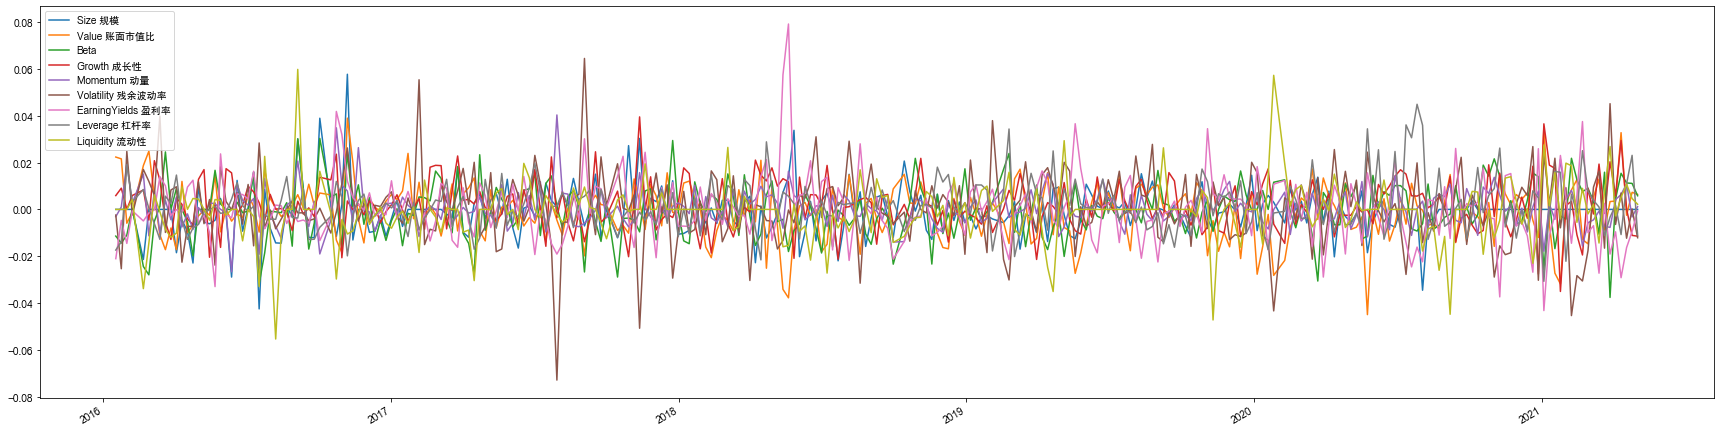

In [268]:
# 风格因子收益率
ax = plt.figure(figsize=(30, 8)).add_subplot(111)
common_factor_ret[style_factor].plot(ax=ax)

<AxesSubplot:>

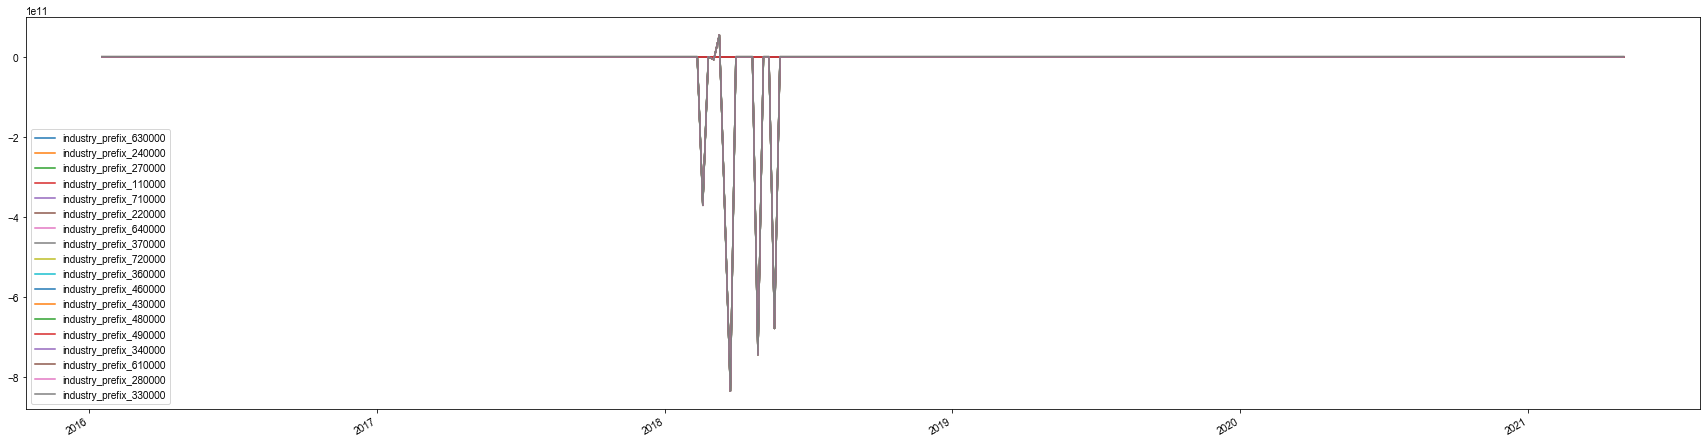

In [275]:
# 行业因子收益率
ax = plt.figure(figsize=(30, 8)).add_subplot(111)
common_factor_ret[list(set(all_industry_name_sw1['code'].to_list()).intersection(set(common_factor_ret.columns.to_list())))].plot(ax=ax)

### 计算基准在行业上的风险敞口

In [203]:
# 基准在行业上的暴露，即行业权重
def get_bm_industry_exposure(start_date, end_date):    
    index = DataSource('index_element_weight').read(start_date=start_date, end_date=end_date)  # 指数成分及权重数据
    hs300_df = index[index['instrument_index'] == '000300.HIX']

    industry_df = DataSource('industry_CN_STOCK_A').read(start_date=start_date, end_date=end_date, fields=['industry_sw_level1'])
    hs300_industry_df = pd.merge(hs300_df, industry_df, how='inner', on=['date', 'instrument'])

    bm_weight = hs300_industry_df.groupby(['date']).apply(get_weight).reset_index() 
    return bm_weight

def get_weight(tmp):
    return tmp[['industry_sw_level1', 'weight']].groupby('industry_sw_level1').sum()
    
# 基准在风格因子上的暴露
def get_bm_component(start_date, end_date):
    index = DataSource('index_element_weight').read(start_date=start_date, end_date=end_date)
    hs300_df = index[index['instrument_index'] == '000300.HIX']
    return hs300_df

bm_industry_exposure = get_bm_industry_exposure(start_date=start_date, end_date=end_date)
bm_component = get_bm_component(start_date=start_date, end_date=end_date)
bm_component

,weight,instrument_index,date,instrument
348,0.00144,000300.HIX,2016-01-04,000778.SZA
349,0.00143,000300.HIX,2016-01-04,600005.SHA
350,0.00289,000300.HIX,2016-01-04,600009.SHA
351,0.00359,000300.HIX,2016-01-04,600010.SHA
352,0.00373,000300.HIX,2016-01-04,600011.SHA
...,...,...,...,...
7203620,0.18000,000300.HIX,2021-05-07,002916.SZA
7203636,0.02700,000300.HIX,2021-05-07,601669.SHA
7203983,0.46060,000300.HIX,2021-05-07,002677.SZA
7204002,0.37600,000300.HIX,2021-05-07,002161.SZA


### 组合优化求解

In [207]:
point_date = '2021-05-07'

# 每月最后一天 
natural_month_date = [dt for dt in end_month_date if dt<=pd.Timestamp(point_date)][-1]
natural_month_date = natural_month_date.strftime('%Y-%m-%d')  # 2021-05-02

# 交易日
trading_calendar_date = [dt for dt in sorted(list(set(bm_component['date']))) if dt<=pd.Timestamp(point_date)][-1]  
trading_calendar_date = trading_calendar_date.strftime('%Y-%m-%d')  # 2021-05-07

# 当期周末
trading_calendar_weekend_date = [dt for dt in sorted(list(set(bm_component['date']))) if dt<=pd.Timestamp(point_date)][-1]  
trading_calendar_weekend_date += datetime.timedelta(days=2)
trading_calendar_weekend_date = trading_calendar_weekend_date.strftime('%Y-%m-%d')  # 2021-05-09

# 指定交易日的基准行业暴露
special_bm_industry_exposure = bm_industry_exposure[bm_industry_exposure['date'] == trading_calendar_date][['industry_sw_level1','weight']].set_index('industry_sw_level1')

# 组合优化
special_risk = special_risk.dropna()  # 计算完的特异收益率
instrument_name = list(set(special_risk.instrument[special_risk['date'] == natural_month_date]))   # natural_month_date

n = len(instrument_name) # 股票数量
m = len(common_factor_ret.columns) # 风格因子数量
 
mu = monthly_price_df[list(set(monthly_price_df.columns).intersection(instrument_name))].pct_change().fillna(0).rolling(36).mean().loc[trading_calendar_weekend_date]
mu.sort_index(inplace=True) # 将mu按股票顺序排序
mu = np.array(mu)

# 计算 X共同风险因子协方差矩阵
sigma_tilde = np.array(common_risk.loc[natural_month_date, :])
sigma_tilde = sigma_tilde.T.dot(sigma_tilde)
 
# 计算 Δ特征因子协方差矩阵，即对角线矩阵
d = np.diag(special_risk[special_risk['date'] == natural_month_date].set_index('instrument')['specified_return'].sort_index().values)
 
# 下面我们计算因子在股票上的载荷， N只股票在K个风险因子上的因子载荷矩阵
F1 = monthly_style_and_industry_factor[monthly_style_and_industry_factor['date'] == natural_month_date]
F1 = F1.set_index('instrument')
F1 = F1.loc[instrument_name, :]
F1 = F1.reset_index()
F1 = F1.sort_values('instrument')
# F = np.array(F1[all_factor_name])
F = np.array(F1[list(set(F1.columns.to_list()).intersection(set(all_factor_name)))])

industry_factor = [i for i in F1.columns if i[:15] == 'industry_prefix']  

# 基准行业暴露与组合所在行业的交集
right_bm_weight = pd.DataFrame(special_bm_industry_exposure, index= [int(i[-6:]) for i in industry_factor] )
right_bm_weight.fillna(0, inplace=True)
h = right_bm_weight.weight/100 

special_bm_component = bm_component[bm_component['date'] == trading_calendar_date]  # 基准在风格因子上的暴露
# w_b = list(pd.DataFrame(special_bm_component.set_index('instrument') ,index=instrument_name).fillna(0)['weight']/100)
w_b = list(special_bm_component.set_index('instrument')['weight']/100)

# 行业中性
H = np.array(F1[industry_factor])
h = np.array(h)   
h = np.array([round(i, 10) for i in h]) # 精度控制，小数点后10位
h[np.isnan(h)]=0  # 替换空值

# 权重归一化
deviate = h.sum()-1
if deviate > 0 :
    h[h.argmax()] = h[h.argmax()] - np.abs(deviate)
elif deviate < 0:
    h[h.argmin()] = h[h.argmin()] + np.abs(deviate)
# assert h.sum() == 1, 'WARING:权重之和不为1！'

# 风格中性
w_b = np.array(w_b)

n_factor = len(style_factor)  # 风格因子数量
X = np.array(F1[style_factor])   # 全部股票在风格因子上的暴露,格式形如（3000，3）

deviate

-0.5017580091953278

### 验证优化结果

In [249]:
# w.T#-
w_b.T

array([0.00126 , 0.00289 , 0.00017 , 0.08954 , 0.00284 , 0.00092 ,
       0.00965 , 0.002   , 0.00923 , 0.015125, 0.01054 , 0.000658,
       0.001121, 0.00363 , 0.00309 , 0.003147, 0.00121 , 0.001093,
       0.00108 , 0.00254 , 0.002595, 0.001795, 0.00548 , 0.001493,
       0.00131 , 0.000784, 0.00214 , 0.00083 , 0.000892, 0.002571,
       0.00166 , 0.00243 , 0.00246 , 0.00254 , 0.01373 , 0.001994,
       0.001134, 0.00102 , 0.001069, 0.00357 , 0.00257 , 0.00154 ,
       0.00214 , 0.002475, 0.000976, 0.00076 , 0.00182 , 0.01286 ,
       0.00466 , 0.011304, 0.00202 , 0.004037, 0.00053 , 0.000656,
       0.00352 , 0.003337, 0.001273, 0.000627, 0.004449, 0.001462,
       0.00129 , 0.002876, 0.00064 , 0.0138  , 0.0007  , 0.001321,
       0.0009  , 0.00047 , 0.00077 , 0.00056 , 0.00039 , 0.00131 ,
       0.00124 , 0.011952, 0.005773, 0.00173 , 0.00073 , 0.00035 ,
       0.00018 , 0.00138 , 0.00117 , 0.001   , 0.00084 , 0.0009  ,
       0.00157 , 0.00177 , 0.00293 , 0.00081 , 0.0012  , 0.001

In [245]:
# 凸优化，CVXPY工具包  https://www.cvxpy.org/index.html
w = cp.Variable((n,))  # 权重
f = cp.Variable((m,))
gamma = cp.Parameter(nonneg=True) # 风险厌恶系数 
Lmax = cp.Parameter() # 杠杆

ret = mu.T@w  # 收益
risk = cp.quad_form(w, F.dot(sigma_tilde).dot(F.T) + d)

# 确定优化目标，目前支持最大化收益、最小化风险、最大化风险调整收益
target = 'maximize_return'

if target == 'maximize_return':
    _obj = cp.Maximize(ret)
elif target == 'minimize_risk':
    _obj =  -1 * cp.Maximize(gamma*risk)
elif target == 'maximize_risk_adjusted_return':
    _obj = cp.Maximize(ret - gamma*risk)

# print('优化目标为： ', target)
# https://colab.research.google.com/github/cvxgrp/cvx_short_course/blob/master/applications/portfolio_optimization.ipynb#scrollTo=ZXLH8Dz-ZNzR
constraint = [
                cp.sum(w) == 1,   
                w >= 0,
                w <= 0.1,     
                w.T * H == h.T,
#                 f == F.T@w,
#                 cp.norm(w, 1) <= Lmax,
                (w.T-w_b.T) * X == np.zeros(len(list(set(monthly_style_and_industry_factor.columns.to_list()).intersection(set(all_factor_name)))))  # style_factor
             ]

prob = cp.Problem(_obj, constraint)
print("prob is DCP:",  prob.is_dcp()) # Problem must follow DCP rules.
Lmax.value = 2  # 1  
gamma.value = 0.1

try:
    prob.solve(solver=cp.SCS,verbose=True)  # 求解器 ECOS(二阶锥优化), SCS(分割锥优化 ), OSQP(算子分割二次优化)
except Exception as e:
    print(e)

# print("optimal value with OSQP:", prob.value)
# print(prob.status)  # prob.status可以有如下状态值：OPTIMAL: 问题被成功解决, INFEASIBLE：问题无解, UNBOUNDED：无边界, OPTIMAL_INACCURATE：解不精确
print('\n最大权重数值为： ', w.value.max())
print('最小权重数值为： ', w.value.min())
print('权重之和为： ', w.value.sum())

portfolio_industry_risk = np.reshape(w.value.T, (d.shape[0], 1)).T.dot(H)

base_info_industry_sw = DataSource('basic_info_IndustrySw').read(start_date=start_date, end_date=end_date)
one_level_industry_info = base_info_industry_sw[base_info_industry_sw.industry_sw_level == 1]
industry_map = dict(zip(one_level_industry_info['code'], one_level_industry_info['name']))

T.plot(pd.DataFrame({'沪深300': h.T.tolist(), '组合': portfolio_industry_risk.tolist()[0]}, index= [industry_map[i[-6:]] for i in industry_factor]), chart_type='column', title='行业风险敞口暴露')

portfolio_factor_risk = (w.value.T-w_b.T).dot(X).tolist()
portfolio_factor_risk = w.value.T.dot(X).tolist()
benchmark_factor_risk =  w_b.T.dot(X).tolist()
T.plot(pd.DataFrame({'沪深300': benchmark_factor_risk , '组合': portfolio_factor_risk}, index=style_factor), chart_type='column', title='风格因子风险敞口暴露')

ValueError: Cannot broadcast dimensions  (41,) (157,)